Name: Sean Noonan

Student ID: 23300159

### Analysing bank dataset

## A. Import Python Modules and Dataset

In [7]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df = pd.read_csv("./bank.csv")
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [2]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [3]:
df.head(100)

age            job   marital  education default  balance housing loan  \
0   32.0     technician    single   tertiary      no      392     yes   no   
1   39.0     technician  divorced  secondary      no      688     yes  yes   
2   59.0        retired   married  secondary      no     1035     yes  yes   
3   47.0    blue-collar   married  secondary      no      398     yes  yes   
4   54.0        retired   married  secondary      no     1004     yes   no   
..   ...            ...       ...        ...     ...      ...     ...  ...   
95  29.0       services   married  secondary      no      399      no   no   
96  44.0    blue-collar   married  secondary      no     1025     yes   no   
97  40.0         admin.    single  secondary      no      782     yes   no   
98  49.0     technician   married  secondary      no      905      no   no   
99  48.0  self-employed   married  secondary      no     1559      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0   cellular    1   apr       957         2    131         2  failure   
1   cellular    1   apr       233         2    133         1  failure   
2   cellular    1   apr       126         2    239         1  failure   
3   cellular    1   apr       274         1    238         2  failure   
4   cellular    1   apr       479         1    307         1  failure   
..       ...  ...   ...       ...       ...    ...       ...      ...   
95  cellular   18   dec       454         6    199         1  failure   
96  cellular   21   dec       116         2    202         1  failure   
97  cellular   21   dec        94         5    202        17  failure   
98  cellular   21   dec       385         7    131         2  failure   
99  cellular   24   dec       520         3    133         3  failure   

   subscribed  
0          no  
1          no  
2          no  
3          no  
4          no  
..        ...  
95         no  
96         no  
97         no  
98         no  
99         no  

[100 rows x 17 columns]

This dataset details whether a customer subscribes to a term deposit campaign. This means they are happy to receive news and updates on the term deposit offerings. The dataset details whether a customer has a loan or not and if they have defaulted on the loan along with their balance. The target variable is whether they have subscribed to a campaign. We have detail on how many campaigns they have subscribed to previously.

It would be interesting to see if they would subscribe to a campaign is dependent on how they are contacted. People comtacted n telephone maybe at hime are more relaxed and willing to consider the option.
It would be in teresting to see how time of the year affects this decision.

#### B.1. Quick Examination of Numerical Attributes

In [5]:
# Print statistical summary for all numerical attributes
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [47]:
numerical_columns = df.select_dtypes(include=['number']).columns
missing_categorical = df[numerical_columns].isnull().sum()

print("Missing values in categorical variables:")
print(missing_categorical)

Missing values in categorical variables:
age         12
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64


Inferences from looking at data:

1. Age is the only numerical column with missing data. It only has 12 out of 2000 missing records.


Missing values for categorical variables

In [44]:
categorical_columns = df.select_dtypes(include=['object']).columns
missing_categorical = df[categorical_columns].isnull().sum()

print("Missing values in categorical variables:")
print(missing_categorical)

Missing values in categorical variables:
job            10
marital         0
education     104
default         0
housing         0
loan            0
contact       191
month           0
poutcome      454
subscribed      0
dtype: int64


poutcome has a high missing rate but that is likely because the person was not contacted before and is important. I will try fill it with average response.

Contact also has a high missing rate. I want to examine this so I might remove rows that do not have it populated.

Education is also 5% missing. I think it is importnt and will.

Other fields are okay but I think.

We can also examine the correlation matrix of all numerical attributes in the form of a **heat map**.

C:\Users\noona\AppData\Local\Temp\ipykernel_7316\2751630893.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


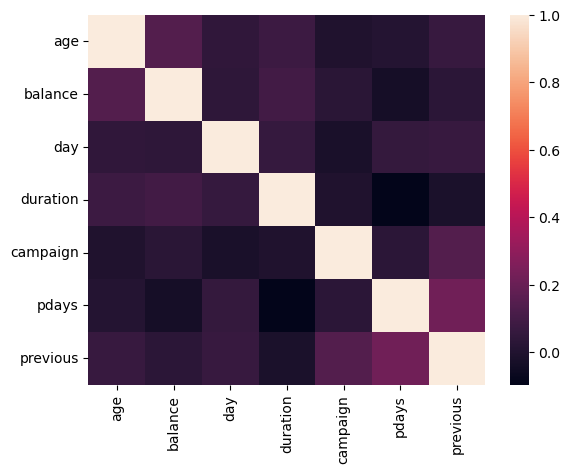

In [8]:
#correlation matrix
sns.heatmap(df.corr());

There are no extremely strong correlations.

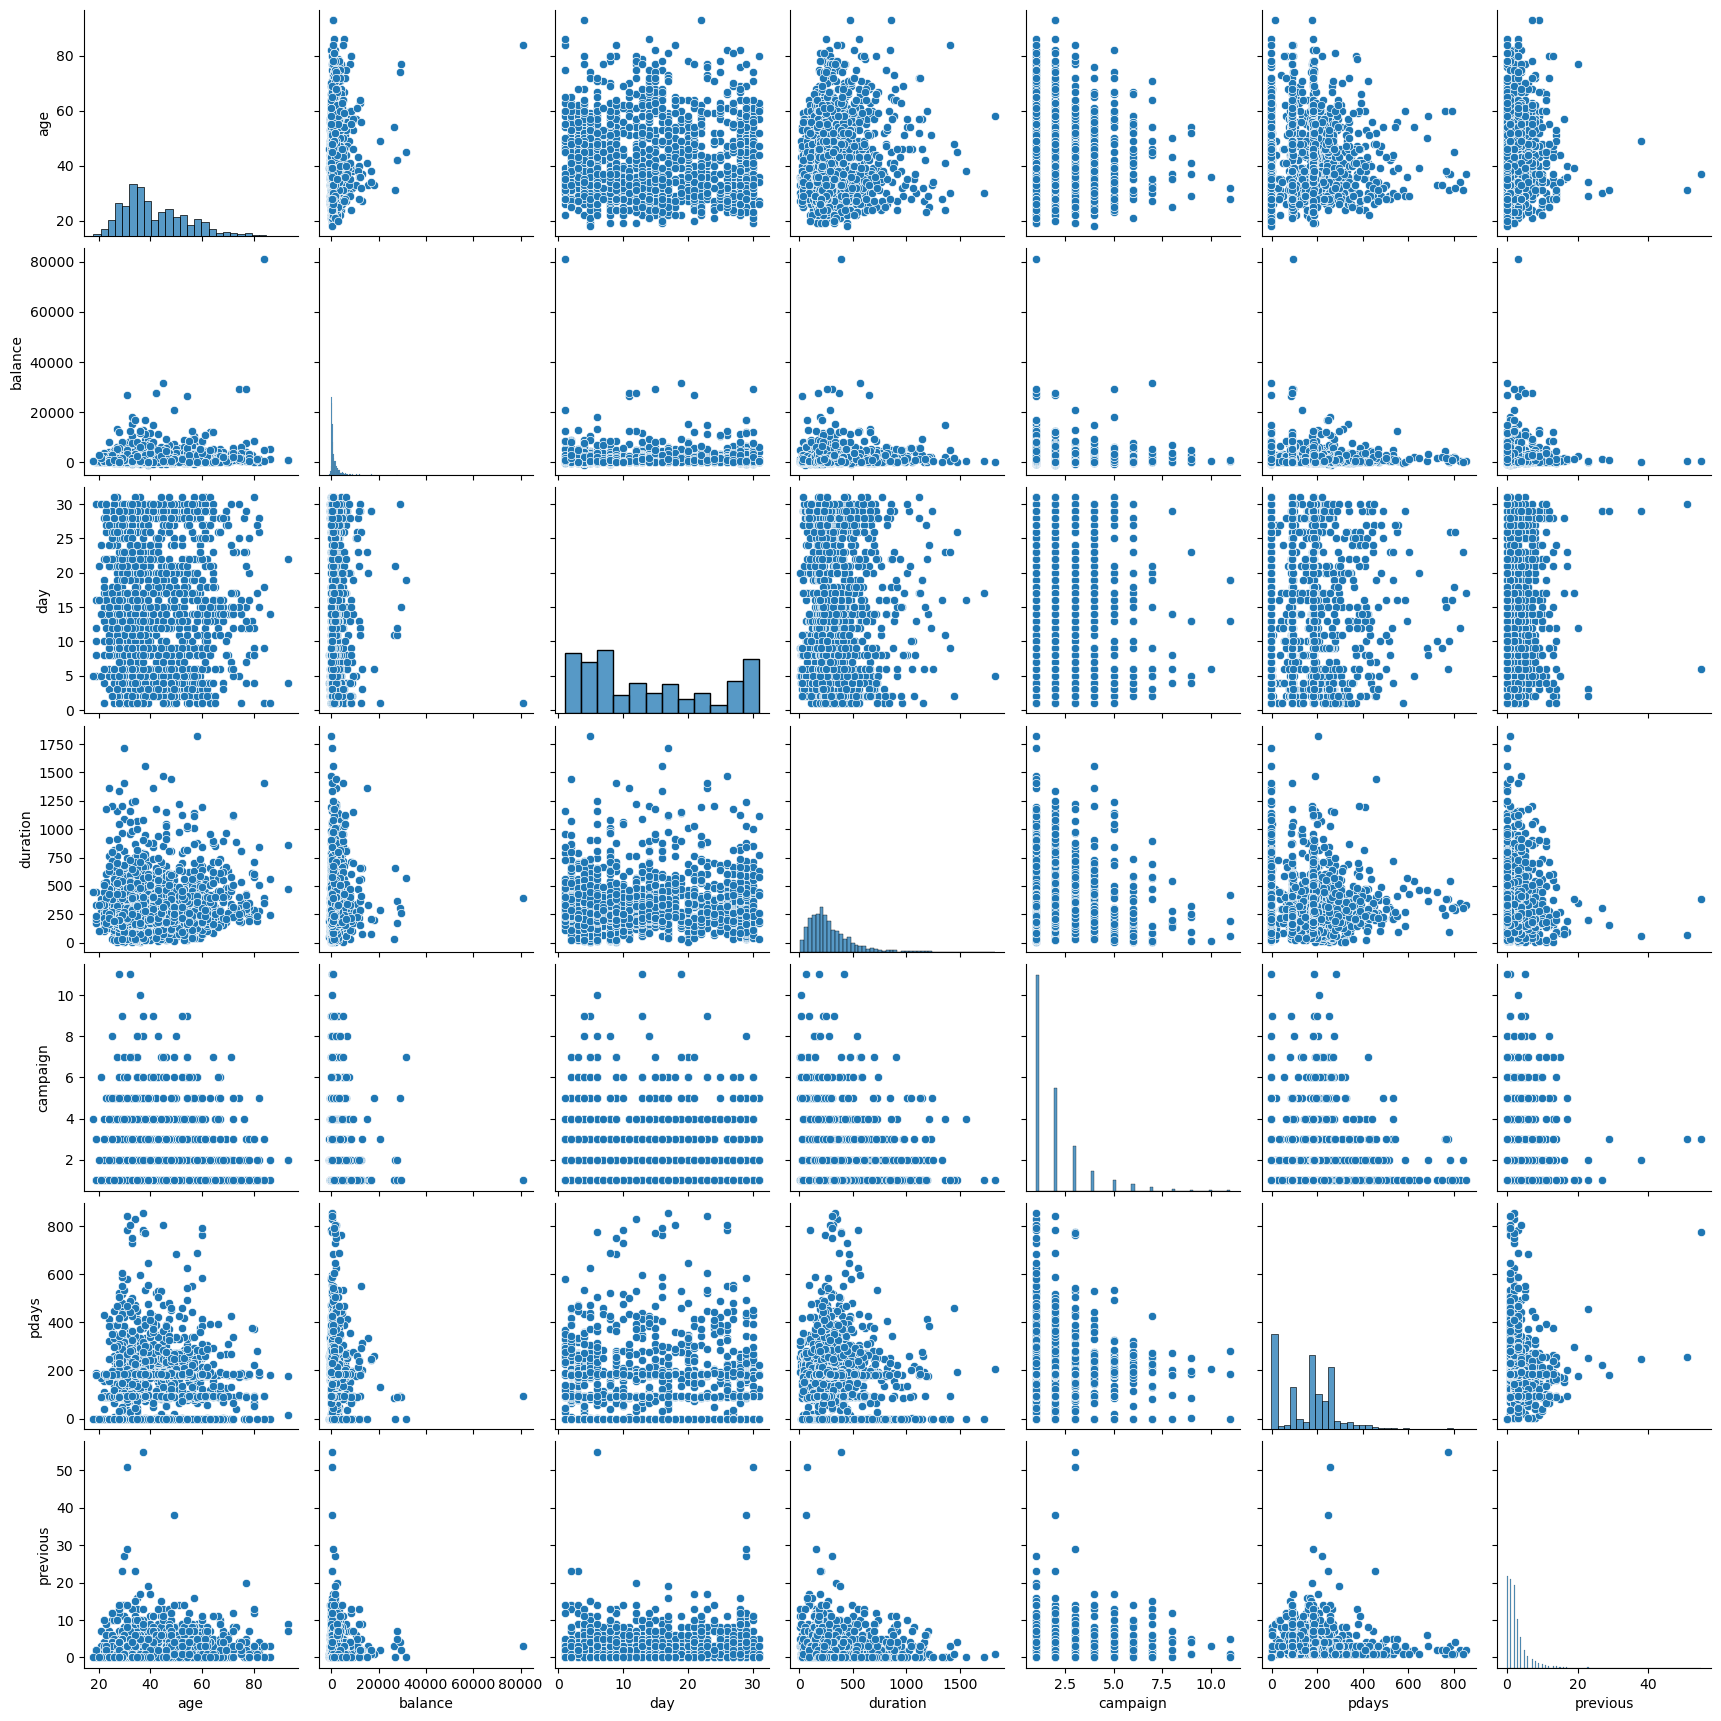

In [9]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df)
plt.show()

#### B.2. Quick Examination of Categorical Attributes

In [10]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

We don't have many examples of telephone

In [15]:
df_telephone = df[df['contact']=='telephone']

In [16]:
df_telephone.head(10)

age          job   marital  education default  balance housing loan  \
43   27.0      student    single  secondary      no     2784     yes   no   
55   35.0  blue-collar   married  secondary      no      360     yes   no   
71   30.0     services   married  secondary      no     4867     yes  yes   
83   57.0      retired  divorced    primary      no      698      no   no   
88   64.0    housemaid   married    primary      no       67      no   no   
102  32.0   management    single   tertiary      no      623      no   no   
160  53.0   management   married    primary      no      798     yes   no   
180  37.0   management   married   tertiary      no       59     yes  yes   
216  45.0   technician   married  secondary      no        0     yes  yes   
239  34.0   technician   married  secondary      no      883      no   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
43   telephone   20   apr       153         1    328         1  failure   
55   telephone   20   apr        24         1    152         3  failure   
71   telephone   20   apr         8         6    306         3    other   
83   telephone    9   dec       135         3    191         2  failure   
88   telephone   14   dec        86         2    111         1  failure   
102  telephone   24   dec       273         1    203         1  failure   
160  telephone    2   feb        45         1    217         2  failure   
180  telephone    2   feb       319         1    213         1  failure   
216  telephone    2   feb       111         2    208         1  failure   
239  telephone    3   feb       166         2    173         3  failure   

    subscribed  
43          no  
55          no  
71          no  
83          no  
88          no  
102         no  
160         no  
180         no  
216         no  
239         no

In [17]:
df_telephone['subscribed'].value_counts()

yes    91
no     55
Name: subscribed, dtype: int64

In [18]:
df['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

We can already see that people contacted via telephone has a far higher frequencey of subscribing.

Our dataset has a equal number of subscribed to not subscribed. This will bias a model.

## C. Distribution Analysis for Numerical Atributes

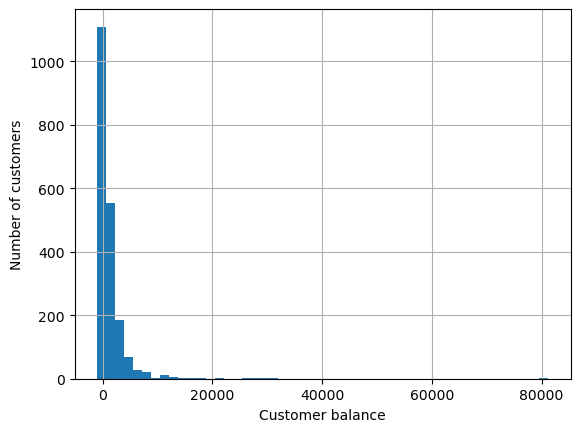

In [20]:
# Let's start by plotting a histogram of Balance using the command:

df['balance'].hist(bins=50)
plt.xlabel('Customer balance')
plt.ylabel('Number of customers')
plt.show()

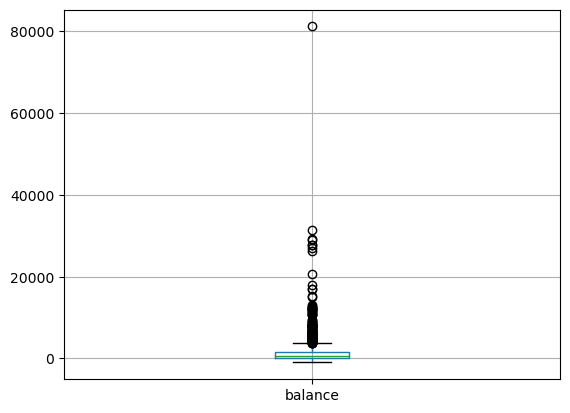

In [22]:
df.boxplot(column='balance')
plt.show()

We clearly have an extrem outlier.

C:\Users\noona\anaconda3\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\noona\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\noona\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


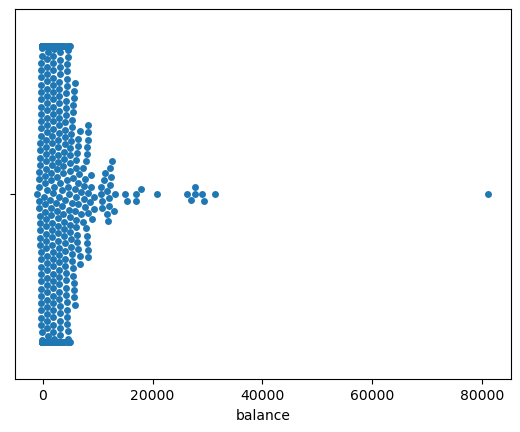

In [23]:
sns.swarmplot(x=df['balance'], orient='v')
plt.show()

## E. Distribution Analysis for Categorical Attributes

In [ ]:
The variable 'month' is rather a categorical attribute with two categories/values:

Let's look at the chances of subscribing based on month. That is, let's examine the relation between atributes `month` and `subscribed`.

In [24]:
frequency_table = df['month'].value_counts(ascending=True)
print('Frequency Table for month:') 
print(frequency_table)

Frequency Table for month:
dec     41
nov     68
mar     70
oct     93
jun    104
sep    134
aug    136
jul    167
apr    205
jan    245
may    333
feb    404
Name: month, dtype: int64


Okay this is not an even distribution

In [31]:
pivot_table_LC = df.pivot_table(values='subscribed',
                                index='month',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

In [32]:
# Print pivot table
print(pivot_table_LC)

       subscribed
month            
apr      0.614634
aug      1.000000
dec      0.292683
feb      0.000000
jan      0.000000
jul      1.000000
jun      1.000000
mar      0.871429
may      0.402402
nov      0.529412
oct      0.967742
sep      1.000000


In [37]:
df_sep = df[df['month']=='sep']
df_sep.tail()
#df_sep.count()
134

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

There are certain months where all calls resulted in a subscriber, namely:August, July, June, September.

February had the most calls and had a 0% success rate. This company should refocus their time on the profitable times of year.

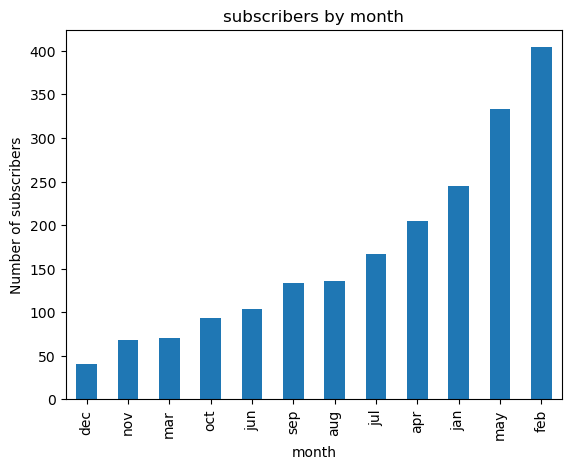

In [30]:
# Plot the frequency table for Credit_History
frequency_table.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('Number of subscribers')
plt.title('subscribers by month')
plt.show()

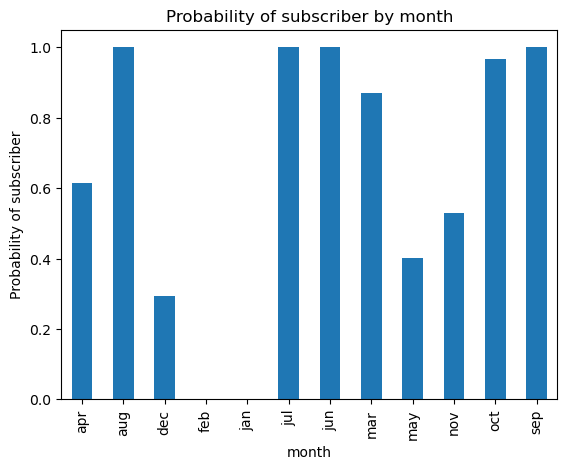

In [38]:
# Plot pivot table
pivot_table_LC.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('Probability of subscriber')
plt.title('Probability of subscriber by month')
plt.legend().set_visible(False) # we don't need the default legend

As we saw before, some months have a far higher probability than others. Maybe there is something else at play here.

We can see around the winter period people are far less likely to subscribe.

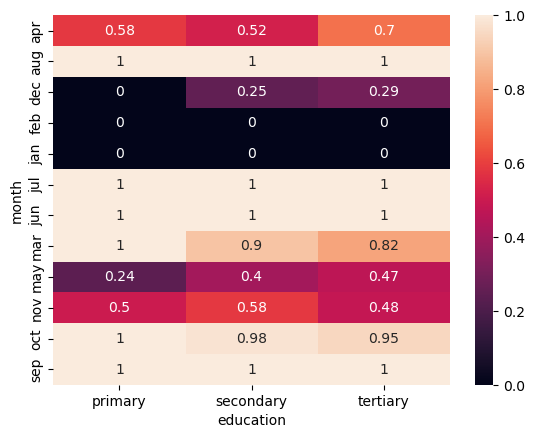

In [41]:
pivot_table_LCG = df.pivot_table(values='subscribed', 
                           index='month', 
                           columns='education',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

Every level of education is likely to subscribe in September.

Questions: 

# Data Preparation

## A. Import Python Modules and Dataset

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

Check for missing values.

In [50]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [231]:
# Make a copy of the data
df = pd.read_csv("./bank.csv")
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [145]:
df_original = df
df = df_original

## B. Process and Encode the Categorical Features

### Encode Ordinal Categorical Attributes 

In [232]:
categorical_columns = df.select_dtypes(include=['object']).columns
missing_categorical = df[categorical_columns].isnull().sum()

print("Missing values in categorical variables:")
print(missing_categorical)

Missing values in categorical variables:
job            10
marital         0
education     104
default         0
housing         0
loan            0
contact       191
month           0
poutcome      454
subscribed      0
dtype: int64


### One-Hot Encode All Other Categorical Attributes

In [233]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job', 'education', 'contact'], 
                        dummy_na=True, 
                        drop_first=True)

age  marital default  balance housing loan  day month  duration  \
1995  20.0   single      no     2785      no   no   16   sep       327   
1996  28.0   single      no      127      no   no   16   sep      1334   
1997  81.0  married      no     1154      no   no   17   sep       231   
1998  46.0  married      no     4343     yes   no   20   sep       185   
1999  40.0  married      no     6403      no   no   22   sep       208   

      campaign  ...  job_services  job_student job_technician job_unemployed  \
1995         2  ...             0            1              0              0   
1996         2  ...             0            0              0              0   
1997         1  ...             0            0              0              0   
1998         1  ...             1            0              0              0   
1999         2  ...             0            0              0              0   

      job_nan  education_secondary  education_tertiary  education_nan  \
1995        0                    0                   0              1   
1996        0                    1                   0              0   
1997        0                    0                   0              0   
1998        0                    0                   0              0   
1999        0                    1                   0              0   

      contact_telephone  contact_nan  
1995                  0            0  
1996                  0            0  
1997                  1            0  
1998                  0            1  
1999                  0            0  

[5 rows x 30 columns]

In [241]:
df.tail()

age  marital default  balance housing loan  day month  duration  \
1995  20.0   single      no     2785      no   no   16   sep       327   
1996  28.0   single      no      127      no   no   16   sep      1334   
1997  81.0  married      no     1154      no   no   17   sep       231   
1998  46.0  married      no     4343     yes   no   20   sep       185   
1999  40.0  married      no     6403      no   no   22   sep       208   

      campaign  ...  job_services  job_student job_technician job_unemployed  \
1995         2  ...             0            1              0              0   
1996         2  ...             0            0              0              0   
1997         1  ...             0            0              0              0   
1998         1  ...             1            0              0              0   
1999         2  ...             0            0              0              0   

      job_nan  education_secondary  education_tertiary  education_nan  \
1995        0                    0                   0              1   
1996        0                    1                   0              0   
1997        0                    0                   0              0   
1998        0                    0                   0              0   
1999        0                    1                   0              0   

      contact_telephone  contact_nan  
1995                  0            0  
1996                  0            0  
1997                  1            0  
1998                  0            1  
1999                  0            0  

[5 rows x 30 columns]

In [250]:
# now one-hot encode all other categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df['month'], df_encoded], axis=1)
df.isna().sum()

month                   0
age                    12
balance                 0
day                     0
duration                0
campaign                0
pdays                   0
previous                0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
marital_married         0
marital_single          0
default_yes             0
housing_yes             0
loan_yes                0
month_aug               0
month_dec               0
month_feb               0
month_jan               0
month_jul               0
month_jun               0
month_mar               0
month_may               0
month_nov               0
month_oct   

## C. Treatment of Missing Values in Numerical Columns

In [251]:
# Find the number of nulls/NaNs in the dataset
df.isna().sum()

month                   0
age                    12
balance                 0
day                     0
duration                0
campaign                0
pdays                   0
previous                0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
marital_married         0
marital_single          0
default_yes             0
housing_yes             0
loan_yes                0
month_aug               0
month_dec               0
month_feb               0
month_jan               0
month_jul               0
month_jun               0
month_mar               0
month_may               0
month_nov               0
month_oct   

Age has missing values, we should try to impute

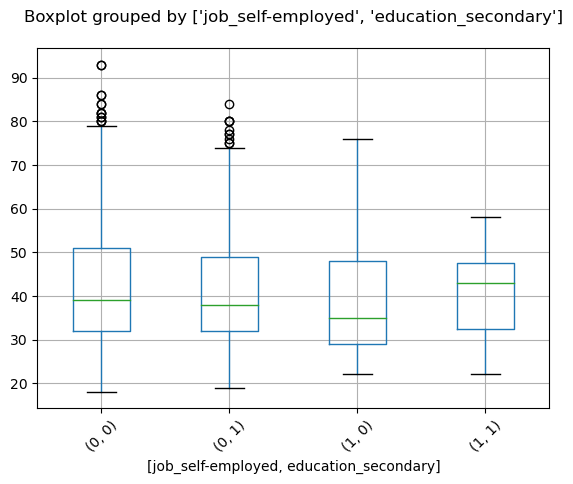

In [252]:
df.boxplot(column='age', by=['job_self-employed','education_secondary'], rot=45)
plt.title("")
plt.show()

We can see some variation in the median of `age` for each group and these medians can be used for imputing the missing values in each group. Next, we create a pivot table, which contains the median values for all four groups.

In [253]:
ptable = df.pivot_table(values='age', 
                        index='job_self-employed',
                        columns='education_secondary',  
                        aggfunc='median')
ptable

education_secondary     0     1
job_self-employed              
0                    39.0  38.0
1                    35.0  43.0

In [254]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['job_self-employed'], x['education_secondary']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [255]:
df.head()

month   age  balance  day  duration  campaign  pdays  previous  \
0   apr  32.0      392    1       957         2    131         2   
1   apr  39.0      688    1       233         2    133         1   
2   apr  59.0     1035    1       126         2    239         1   
3   apr  47.0      398    1       274         1    238         2   
4   apr  54.0     1004    1       479         1    307         1   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0                0                 0  ...          0          0          0   
1                0                 0  ...          0          0          0   
2                0                 0  ...          0          0          0   
3                1                 0  ...          0          0          0   
4                0                 0  ...          0          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          0          0          0          0               0   
1          0          0          0          0               0   
2          0          0          0          0               0   
3          0          0          0          0               0   
4          0          0          0          0               0   

   poutcome_success  subscribed_yes  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0  

[5 rows x 43 columns]

## D. Rescaling Features

Lets use robustScalar to scale and del with outliers. We saw outliers for balance.

In [256]:
robust_scaler = RobustScaler()
df[['balance']] = robust_scaler.fit_transform(df[['balance']])

## E. Treatment of Outliers

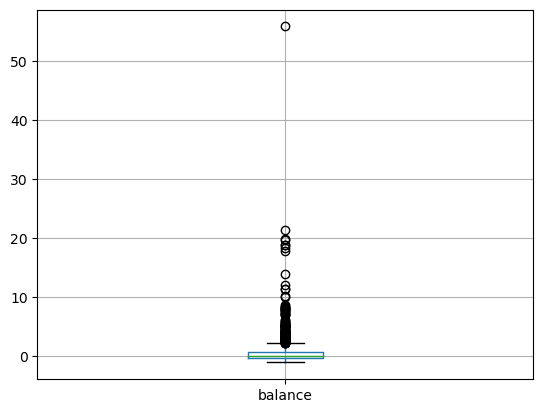

In [257]:
df.boxplot(column=['balance'])
plt.show()

Histogram after rescale them

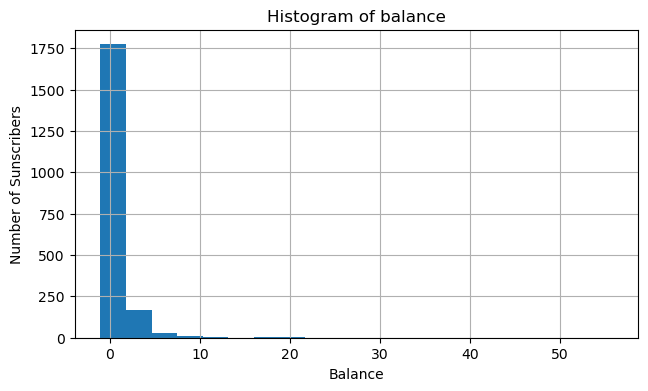

In [258]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Sunscribers')
df['balance'].hist(bins=20)



plt.show()

Data is skewed to the left

In [259]:
df[['balance']].min()

balance   -1.060984
dtype: float64

Due to extremity of value we should not remove outliers but rather diminish their effect on the ML algorithm by scaling them using a og function

In [260]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance'] + abs(min(df['balance'])) + 1)

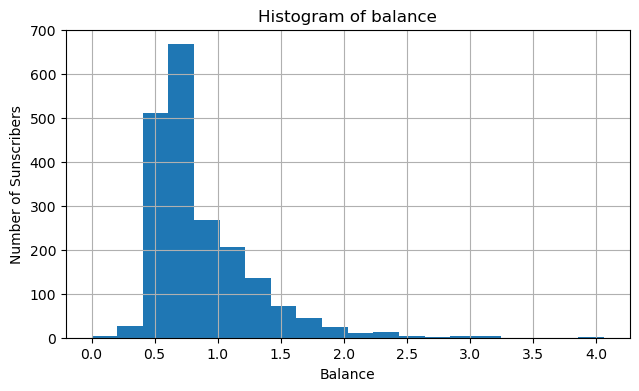

In [261]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Sunscribers')
df['balance'].hist(bins=20)



plt.show()

Not as skewed

Let's examine the distribution of values in `campaign`. 

In [262]:
df['campaign'].value_counts()

1     1063
2      506
3      219
4       99
5       50
6       31
7       17
8        6
9        5
11       3
10       1
Name: campaign, dtype: int64

Note that `campaign` is rather an ordinal than a continuous numerical feature with more than 80% of its values being 1. None of its values appear to be actual outliers. To bring it to the interval $[0,1]$ we can divide all values by 11 (effectively applying MinMaxScaler to it). If we applied RobustScaler and/or log transformation to it instead then it would become even more skewed to the right .

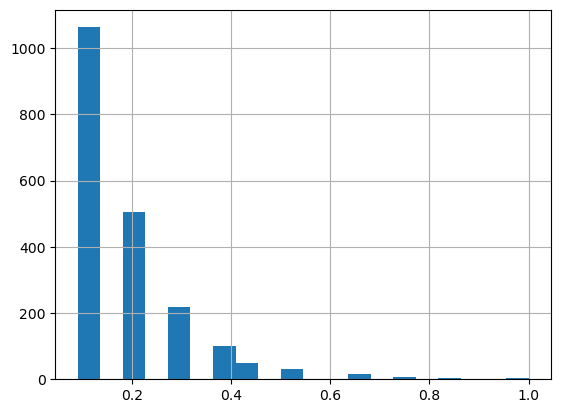

In [263]:
df['campaign'] = df['campaign']/11
df['campaign'].hist(bins=20)
plt.show()

## F. Creation of Derived Features

In [264]:
df.head()

month   age   balance  day  duration  campaign  pdays  previous  \
0   apr  32.0  0.668238    1       957  0.181818    131         2   
1   apr  39.0  0.768220    1       233  0.181818    133         1   
2   apr  59.0  0.873966    1       126  0.181818    239         1   
3   apr  47.0  0.670367    1       274  0.090909    238         2   
4   apr  54.0  0.864961    1       479  0.090909    307         1   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0                0                 0  ...          0          0          0   
1                0                 0  ...          0          0          0   
2                0                 0  ...          0          0          0   
3                1                 0  ...          0          0          0   
4                0                 0  ...          0          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          0          0          0          0               0   
1          0          0          0          0               0   
2          0          0          0          0               0   
3          0          0          0          0               0   
4          0          0          0          0               0   

   poutcome_success  subscribed_yes  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0  

[5 rows x 43 columns]

Column `previous` contains many zeros which can be interpreted as `there is no co-applicant with income greater than 0`. The zeros are *missing values* which should not be filled in because they are missing for a reason. On the other hand, they skew the feature towards 0 and this cannot be easily fixed with a log transformation.

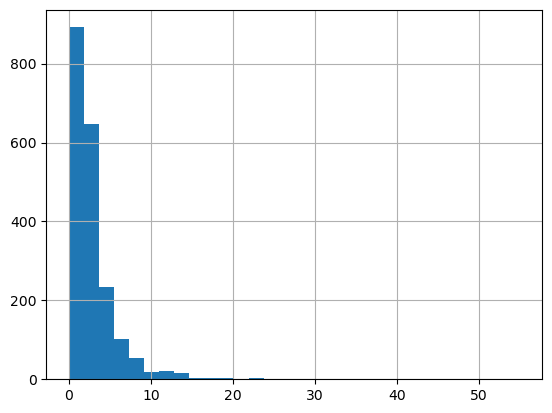

In [265]:
df['previous'].hist(bins=30)
plt.show()

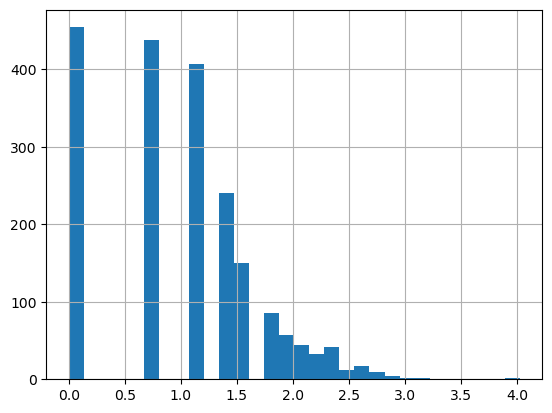

In [266]:
np.log(df['previous']+1).hist(bins=30)
plt.show()

Les see about creating a cyclical variable for month

In [271]:
df.tail()

month   age   balance  day  duration  campaign  pdays  previous  \
1995   sep  20.0  1.283472   16       327  0.181818     -1         0   
1996   sep  28.0  0.569369   16      1334  0.181818     -1         0   
1997   sep  81.0  0.907800   17       231  0.090909     -1         0   
1998   sep  46.0  1.545186   20       185  0.090909     -1         0   
1999   sep  40.0  1.810978   22       208  0.181818     -1         0   

      job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
1995                0                 0  ...          0          0          0   
1996                0                 0  ...          0          0          0   
1997                0                 0  ...          0          0          0   
1998                0                 0  ...          0          0          0   
1999                0                 1  ...          0          0          0   

      month_may  month_nov  month_oct  month_sep  poutcome_other  \
1995          0          0          0          1               0   
1996          0          0          0          1               0   
1997          0          0          0          1               0   
1998          0          0          0          1               0   
1999          0          0          0          1               0   

      poutcome_success  subscribed_yes  
1995                 0               1  
1996                 0               1  
1997                 0               1  
1998                 0               1  
1999                 0               1  

[5 rows x 43 columns]

In [278]:
print(df['month'].unique())

['apr' 'dec' 'feb' 'jan' 'mar' 'may' 'nov' 'oct' 'aug' 'jul' 'jun' 'sep']


In [280]:
# Create a mapper

mapper = {
    "jan": 0,
    "feb": 1,
    "mar": 2,
    "apr": 3,
    "may": 4,
    "jun": 5,
    "jul": 6,
    "aug": 7,
    "sep": 8,
    "oct": 9,
    "nov": 10,
    "dec": 11,
}

df['month'] = df['month'].replace(mapper)

df.tail()

month   age   balance  day  duration  campaign  pdays  previous  \
1995      8  20.0  1.283472   16       327  0.181818     -1         0   
1996      8  28.0  0.569369   16      1334  0.181818     -1         0   
1997      8  81.0  0.907800   17       231  0.090909     -1         0   
1998      8  46.0  1.545186   20       185  0.090909     -1         0   
1999      8  40.0  1.810978   22       208  0.181818     -1         0   

      job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
1995                0                 0  ...          0          0          0   
1996                0                 0  ...          0          0          0   
1997                0                 0  ...          0          0          0   
1998                0                 0  ...          0          0          0   
1999                0                 1  ...          0          0          0   

      month_may  month_nov  month_oct  month_sep  poutcome_other  \
1995          0          0          0          1               0   
1996          0          0          0          1               0   
1997          0          0          0          1               0   
1998          0          0          0          1               0   
1999          0          0          0          1               0   

      poutcome_success  subscribed_yes  
1995                 0               1  
1996                 0               1  
1997                 0               1  
1998                 0               1  
1999                 0               1  

[5 rows x 43 columns]

In [269]:
from feature_engine.creation import CyclicalFeatures

In [283]:
df_red = pd.concat([df['month'],df['day'] ], axis=1)
df_red.head()

month  day
0      3    1
1      3    1
2      3    1
3      3    1
4      3    1

In [284]:
cyclical = CyclicalFeatures(variables=None, drop_original=False)

X = cyclical.fit_transform(df_red)

In [285]:
print(cyclical.max_values_)

{'month': 11, 'day': 31}


In [286]:
print(X.head())

   month  day  month_sin  month_cos   day_sin  day_cos
0      3    1   0.989821  -0.142315  0.201299  0.97953
1      3    1   0.989821  -0.142315  0.201299  0.97953
2      3    1   0.989821  -0.142315  0.201299  0.97953
3      3    1   0.989821  -0.142315  0.201299  0.97953
4      3    1   0.989821  -0.142315  0.201299  0.97953


In [288]:
df_final = pd.concat([df, X ], axis=1)
df_final.head()

month   age   balance  day  duration  campaign  pdays  previous  \
0      3  32.0  0.668238    1       957  0.181818    131         2   
1      3  39.0  0.768220    1       233  0.181818    133         1   
2      3  59.0  0.873966    1       126  0.181818    239         1   
3      3  47.0  0.670367    1       274  0.090909    238         2   
4      3  54.0  0.864961    1       479  0.090909    307         1   

   job_blue-collar  job_entrepreneur  ...  month_sep  poutcome_other  \
0                0                 0  ...          0               0   
1                0                 0  ...          0               0   
2                0                 0  ...          0               0   
3                1                 0  ...          0               0   
4                0                 0  ...          0               0   

   poutcome_success  subscribed_yes  month  day  month_sin  month_cos  \
0                 0               0      3    1   0.989821  -0.142315   
1                 0               0      3    1   0.989821  -0.142315   
2                 0               0      3    1   0.989821  -0.142315   
3                 0               0      3    1   0.989821  -0.142315   
4                 0               0      3    1   0.989821  -0.142315   

    day_sin  day_cos  
0  0.201299  0.97953  
1  0.201299  0.97953  
2  0.201299  0.97953  
3  0.201299  0.97953  
4  0.201299  0.97953  

[5 rows x 49 columns]